En este experimento vamos a calcular la accuracy de kNN con distintos valores de k y aplicandole K-Fold Cross Validation con K=5 para ver si cambia algo al aplicar técnica. Primero corremos un script para el build de las librerias de c++ como modulos de python.

In [ ]:
!sh build.sh

Importamos librerias necesarias

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import metnum
from utils import get_MNIST_XY
from pathlib import Path
import random

Obtenemos el dataset de mnist, en este caso, solo 10000 elementos por temas de tiempo de ejecucion. 
Dividimos el dataset en una instancia de entrenamiento con 4/5 del total de imagenes y validación con 1/5 del total. El dataset está shuffleado sobre si mismo.

In [4]:
X, y = get_MNIST_XY(0.8, 10000)

Elegimos la cantidad de k's a testear. En este caso, haremos del 1 al 130

In [5]:
rango_k = 130

Ejecutamos el loop con cada uno de los k de kNN en el rango entre 1 y rango_k y K de K-Fold con el valor 5. Luego, guardamos los resultados en accuracies

In [6]:
accuracies = []
for k in range(rango_k):
    print(f'Current k: {k}')
    kf = KFold(n_splits=5, shuffle=True)
    accuracies_by_split = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf_metnum = metnum.KNNClassifier(k)
        clf_metnum.fit(X_train, y_train)
        accuracies_by_split += accuracy_score(clf_metnum.predict(X_test), y_test)
    acc_prom = accuracies_by_split/5
    accuracies.append(acc_prom)

Current k: 0
Current k: 1
Current k: 2
Current k: 3
Current k: 4
Current k: 5
Current k: 6
Current k: 7
Current k: 8
Current k: 9
Current k: 10
Current k: 11
Current k: 12
Current k: 13
Current k: 14
Current k: 15
Current k: 16
Current k: 17
Current k: 18
Current k: 19
Current k: 20
Current k: 21
Current k: 22
Current k: 23
Current k: 24
Current k: 25
Current k: 26
Current k: 27
Current k: 28
Current k: 29
Current k: 30
Current k: 31
Current k: 32
Current k: 33
Current k: 34
Current k: 35
Current k: 36
Current k: 37
Current k: 38
Current k: 39
Current k: 40
Current k: 41
Current k: 42
Current k: 43
Current k: 44
Current k: 45
Current k: 46
Current k: 47
Current k: 48
Current k: 49
Current k: 50
Current k: 51
Current k: 52
Current k: 53
Current k: 54
Current k: 55
Current k: 56
Current k: 57
Current k: 58
Current k: 59
Current k: 60
Current k: 61
Current k: 62
Current k: 63
Current k: 64
Current k: 65
Current k: 66
Current k: 67
Current k: 68
Current k: 69
Current k: 70
Current k: 71
Cu

In [7]:
accuracies

[0.1059,
 0.9423,
 0.9425000000000001,
 0.9448000000000001,
 0.9454,
 0.9461,
 0.9424999999999999,
 0.9420999999999999,
 0.9416,
 0.9407,
 0.9387000000000001,
 0.9376999999999999,
 0.9375,
 0.9367000000000001,
 0.9350000000000002,
 0.9349000000000001,
 0.9334,
 0.9328,
 0.9308,
 0.9289,
 0.9274000000000001,
 0.9285,
 0.9268000000000001,
 0.9271,
 0.925,
 0.924,
 0.9249,
 0.9208999999999999,
 0.9212,
 0.9187000000000001,
 0.9200999999999999,
 0.9190000000000002,
 0.9164,
 0.9182,
 0.9168,
 0.9141999999999999,
 0.9138,
 0.9145,
 0.9138999999999999,
 0.9126999999999998,
 0.9127000000000001,
 0.9114000000000001,
 0.9108,
 0.9100999999999999,
 0.9099999999999999,
 0.908,
 0.9097,
 0.908,
 0.9075,
 0.9067000000000001,
 0.9075,
 0.9055,
 0.9057999999999999,
 0.9046000000000001,
 0.9030999999999999,
 0.9028,
 0.9037,
 0.9019999999999999,
 0.9004999999999999,
 0.8996999999999999,
 0.8996999999999999,
 0.8987999999999999,
 0.8995,
 0.899,
 0.8987999999999999,
 0.8975,
 0.8965,
 0.8981,
 0.897799

Por último, graficamos las accuracies en función del k de kNN, todas ellas calculadas con K-Fold, K=5

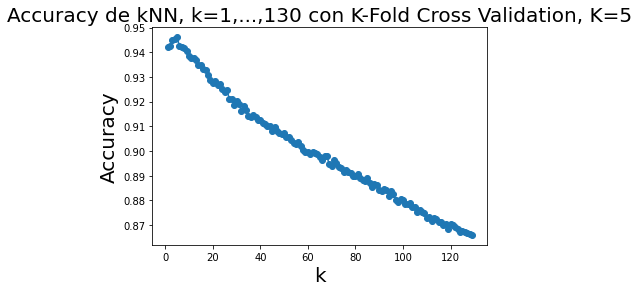

In [8]:
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=10)

plt.plot(range(1, rango_k), accuracies[1:], '-o')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy de kNN, k=1,...,130 con K-Fold Cross Validation, K=5', fontsize=20)
plt.show()